# Linear regression model from scratch

Linear regression is one of the foundational algorithms in the world of statistics and machine learning. At its core, it is a method used to discern relationships and predict outcomes. Imagine plotting scattered points on a graph, and then trying to draw a single line that best captures the underlying trend of those points. This line is what linear regression helps us derive. With applications ranging from predicting house prices to analyzing trends in science experiments, its versatility and simplicity have made it an indispensable tool. In this article, we'll delve deep into the mathematical crux of linear regression, understanding the formulae that power it and the optimization techniques employed to ensure accuracy. 

### Main Concepts
It is a statistical model based on $ y = mx + c $  where;
<br>m is slope/coeffiecient
<br>x is independent variable
<br>c is y-intercept/bias

Variations of the formula include:
<br>$y_{pred}$ or $\hat{y} = w_{0} + w_{1}x$
<br>$y_{pred}$ or $\hat{y} = mx + b$

<br>We want to calculate the optimal values of m and c that will produce the most accurate predicted y based on the x value. This means that we need to minimize the error between the line of best fit and the inidividual points.
<br>To do this we need to iterate through the data set and find these values, minimizing the error. We do this by finding the derivatives(delta/change) of the Error with respect to slope and bias

### Error Equation
We normally use the Mean Squared Error Function which is shown below<br>

$ E = {1 \over n​} \sum \limits _{i=0} ^{n} ​(y_{i}​−(mx_{i}​+c))$

### Derivative equations
Change in slope<br>

$ {\delta E \over \delta m} = -{2\over n} * \sum \limits _{i=0} ^{n} x _{i} (y _{i}-(mx_{i} + c)) $
<br><br>

Change in bias/y-intercept<br>

$ {\delta E \over \delta b} = -{2 \over n} * \sum \limits _{i=0} ^{n} (y_{i} -(mx_{i} + c))$

### New values of m and b
$ m_{new} = m_{current} - lr * {\delta E \over \delta m} $
<br><br>

$ b_{new} = b_{current} - lr * {\delta E \over \delta b} $


## Putting the model to the test 👍

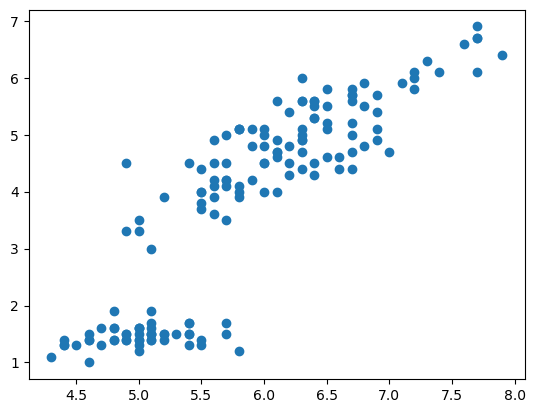

In [35]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt # plotting and visualizing the subject data
import numpy as np

data = pd.DataFrame(data=load_iris().data,columns=load_iris().feature_names)
data['target'] = load_iris().target

plt.scatter(x=data['sepal length (cm)'],y=data['petal length (cm)'])
plt.show()


In [36]:
from sklearn.model_selection import train_test_split

X = data['petal length (cm)'].values.reshape(-1,1)
y = data['sepal length (cm)'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=42)

In [37]:
def mse(y_true,predicted):
    return np.mean((y_true - predicted)**2)

# Trying out the custom model

In [38]:
from linear_regression import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

predicted = reg.predict(X_test)
print(f'MSE of model from scratch: {mse(y_test,predicted)}')

MSE of model from scratch: 0.15719601070095474


# Comparing with Linear Reg model by Sklearn

In [39]:
from sklearn.linear_model import LinearRegression

linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train,y_train)

# Predicting
y_pred = linearRegressionModel.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred,squared=True)

print(f'MSE of sklearn: {mse}')

MSE of sklearn: 0.15745786422932898
